# CAMB Late DE
This is a CAMB modification to account for many late-time dark energy parametrizations. This notebook shows how to use each model.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import camb
print(f"Using CAMB version {camb.__version__} installed at {camb.__file__}")

Using CAMB version 1.5.0 installed at /home/grads/data/Diogo/CAMBLateDE/camb/__init__.py


# Linear Interpolation Models
`DEmodel = 6` is the linear interpolation with 2 bins, where you set `w0, w1`, the equations of state, and `z1, z2`, the knot redshifts, such that $w(z = 0) = w_0$, $w(z = z_1) = w_1$ and $w(z = z_2) = -1$

In [2]:
zs = [0, 1, 1.5]
ws = [-1.1, -0.9]
cosmo = camb.set_params(
    # Background
    H0 = 70, ombh2=0.02238280, omch2=0.1201075, TCMB = 2.7255,
    # Dark Energy
    dark_energy_model = 'ppf',
    DEmodel = 6, # 2 bins
    w0=ws[0], w1=ws[1],
    z1=zs[1], z2=zs[2],
    # Neutrinos
    omnuh2 = 0, num_nu_massless=3.044, num_nu_massive = 0,
    nu_mass_degeneracies=[0], nu_mass_numbers = [0],
    # Initial Power Spectrum
    As = 2.100549e-09, ns = 0.9660499, 
    YHe = 0.246, WantTransfer=True
)
results = camb.get_results(cosmo)
aa = np.logspace(-2, 0, 1000)
zz = 1/aa - 1
rho, ww = results.get_dark_energy_rho_w(aa)

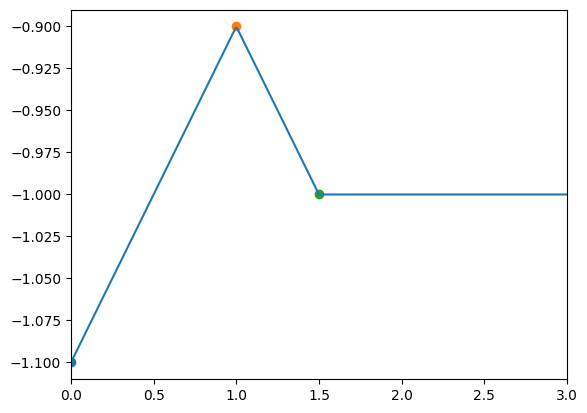

In [3]:
plt.plot(zz, ww)
plt.xlim(0, 3)
plt.scatter(zs[0], ws[0])
plt.scatter(zs[1], ws[1])
plt.scatter(zs[-1], -1)

`DEmodel = 8` is the linear interpolation with 5 bins, where you set `w0, w1, w2, w3, w4`, the equations of state, and `z1, z2, z3, z4, z5`, the knot redshifts, such that $w(z = 0) = w_0$, $w(z = z_i) = w_i$ for $i = 1, ..., 4$ and $w(z = z_5) = -1$

In [4]:
zs = [0, 0.5, 1, 1.3, 1.6, 2]
ws = [-1.1, -0.9, -1.4, -0.9, -1.1]
cosmo = camb.set_params(
    # Background
    H0=70, ombh2=0.02238280, omch2=0.1201075, TCMB=2.7255,
    # Dark Energy
    dark_energy_model='ppf',
    DEmodel=8, # 5 bins
    w0=ws[0], w1=ws[1], w2=ws[2], w3=ws[3], w4=ws[4],
    z1=zs[1], z2=zs[2], z3=zs[3], z4=zs[4], z5=zs[5],
    # Neutrinos
    omnuh2 = 0, num_nu_massless=3.044, num_nu_massive = 0,
    nu_mass_degeneracies=[0], nu_mass_numbers = [0],
    # Initial Power Spectrum
    As = 2.100549e-09, ns = 0.9660499, 
    YHe = 0.246, WantTransfer=True
)
results = camb.get_results(cosmo)
aa = np.logspace(-2, 0, 1000)
zz = 1/aa - 1
rho, ww = results.get_dark_energy_rho_w(aa)

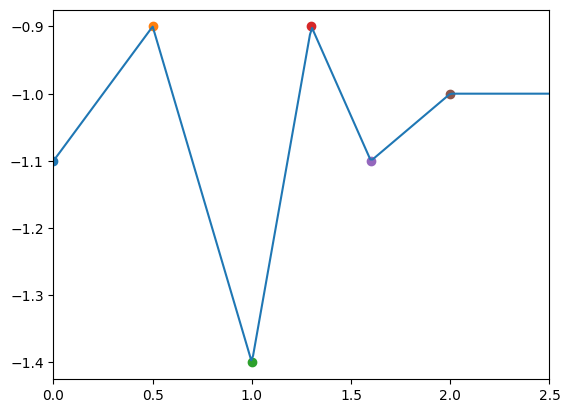

In [5]:
plt.plot(zz, ww)
plt.xlim(0, 2.5)
for z, w in zip(zs, ws):
    plt.scatter(z, w)
plt.scatter(zs[-1], -1)

# The transition model

A simple parametrization to study transitions in $w(z)$:

$w(z) = a + b \times \tanh(\frac{z - z_c}{\sigma})$

$w(z \gg z_c) = a + b$

$w(z \ll z_c) = a - b$

In [11]:
# The transition model
cosmo = camb.set_params(
    # Background
    H0=70, ombh2=0.02238280, omch2=0.1201075, TCMB=2.7255,
    # Dark Energy
    dark_energy_model='ppf',
    DEmodel=15, # tanh
    w0=-1.1, w1=-0.9, z1=1,
    # Neutrinos
    omnuh2 = 0, num_nu_massless=3.044, num_nu_massive = 0,
    nu_mass_degeneracies=[0], nu_mass_numbers = [0],
    # Initial Power Spectrum
    As = 2.100549e-09, ns = 0.9660499, 
    YHe = 0.246, WantTransfer=True
)
results = camb.get_results(cosmo)
aa = np.logspace(-2, 0, 10000)
zz = 1/aa - 1
rho, ww = results.get_dark_energy_rho_w(aa)

Text(0.5, 0, '$z$')

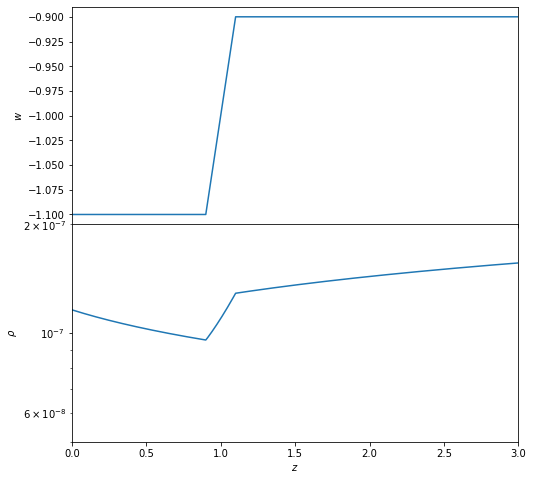

In [12]:
fig, axs = plt.subplots(2, 1, figsize=(8,8), sharex=True)
plt.subplots_adjust(hspace=0)
axs[0].plot(zz, ww_15)
axs[1].semilogy(zz, rho_15)
plt.xlim(0, 3)
axs[1].set_ylim(5e-8, 2e-7)
axs[0].set_ylabel(r"$w$")
axs[1].set_ylabel(r"$\rho$")
plt.xlabel(r"$z$")

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import camb
print(f"Using CAMB version {camb.__version__} installed at {camb.__file__}")

Using CAMB version 1.5.0 installed at /home/grads/data/Diogo/CAMBLateDE/camb/__init__.py


In [2]:
# The transition model

cosmo_15 = camb.set_params(
    # Background
    H0=70, ombh2=0.02238280, omch2=0.1201075, TCMB=2.7255,
    # Dark Energy
    dark_energy_model='ppf',
    DEmodel=15, # tanh
    w0=-1.1, w1=-0.9, z1=1,
    zc=1, sigma=0.1,
    # Neutrinos
    omnuh2 = 0, num_nu_massless=3.044, num_nu_massive = 0,
    nu_mass_degeneracies=[0], nu_mass_numbers = [0],
    # Initial Power Spectrum
    As = 2.100549e-09, ns = 0.9660499, 
    YHe = 0.246, WantTransfer=True
)

cosmo_16 = camb.set_params(
    # Background
    H0=70, ombh2=0.02238280, omch2=0.1201075, TCMB=2.7255,
    # Dark Energy
    dark_energy_model='ppf',
    DEmodel=16, # tanh
    w0=-1.1, w1=-0.9, z1=1,
    zc=1, sigma=0.1,
    # Neutrinos
    omnuh2 = 0, num_nu_massless=3.044, num_nu_massive = 0,
    nu_mass_degeneracies=[0], nu_mass_numbers = [0],
    # Initial Power Spectrum
    As = 2.100549e-09, ns = 0.9660499, 
    YHe = 0.246, WantTransfer=True
)

aa = np.logspace(-2, 0, 10000)
zz = 1/aa - 1

results_15 = camb.get_results(cosmo_15)
rho_15, ww_15 = results_15.get_dark_energy_rho_w(aa)

results_16 = camb.get_results(cosmo_16)
rho_16, ww_16 = results_16.get_dark_energy_rho_w(aa)

Text(0.5, 0, '$z$')

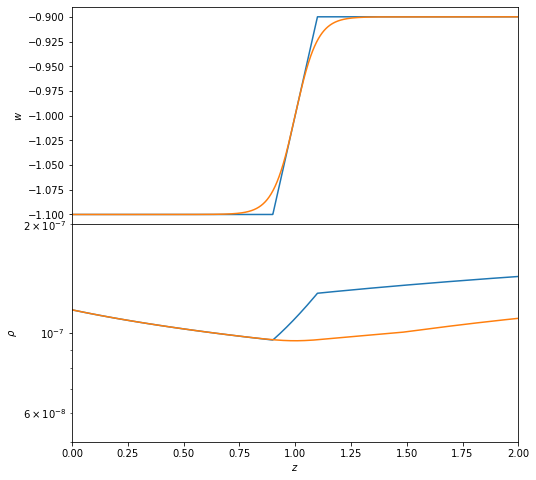

In [3]:
fig, axs = plt.subplots(2, 1, figsize=(8,8), sharex=True)
plt.subplots_adjust(hspace=0)
axs[0].plot(zz, ww_15)
axs[0].plot(zz, ww_16)
axs[1].semilogy(zz, rho_15)
axs[1].semilogy(zz, rho_16)

plt.xlim(0, 2)
axs[1].set_ylim(5e-8, 2e-7)
axs[0].set_ylabel(r"$w$")
axs[1].set_ylabel(r"$\rho$")
plt.xlabel(r"$z$")

In [34]:
# See eq 21 of Planck's 201 paper https://arxiv.org/pdf/1502.01590
# pb = p_(i-1), pa = p_i

def wde(z, zi):
    #Delta_wde = (pa - pb) / 2
    s = 0.2
    return -1.1 + 0.1 * (np.tanh((z-zi)/s) + 1)

(0.0, 3.0)

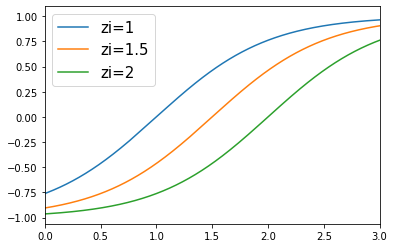

In [41]:
plt.plot(zz,np.tanh(zz-1), label='zi=1')
plt.plot(zz,np.tanh(zz-1.5), label='zi=1.5')
plt.plot(zz,np.tanh(zz-2), label='zi=2')
plt.legend(loc='best',fontsize=15)
plt.xlim(0,3)